## Incendios forestales en España (2001-2015)

### Analisis explotario y data wrangling:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
df= pd.read_csv("../python-ml-course-master/fires-all.csv")

In [104]:
df.head()

,superficie,fecha,lat,lng,latlng_explicit,idcomunidad,causa,causa_desc,muertos,heridos,time_ctrl,time_ext,personal,medios,gastos,perdidas,year,month
0,3.70,2001-03-18,42.954656,-2.325719,1,1,4,2,0.0,0.0,150,180,10,2,661.0,553.0,2001,3
1,1.50,2001-03-24,42.552183,-2.640673,1,1,2,10,0.0,0.0,275,290,4,1,661.0,451.0,2001,3
2,1.50,2001-04-16,48.302507,-3.397798,1,1,2,10,0.0,0.0,135,165,4,1,312.0,902.0,2001,4
3,7.50,2001-05-25,42.946479,-2.485163,1,1,4,2,0.0,0.0,335,410,6,1,1082.0,15338.0,2001,5
4,1.04,2001-07-20,43.091715,-3.024574,1,1,5,0,0.0,0.0,45,75,11,2,270.0,2866.0,2001,7


In [4]:
df.tail()

,id,superficie,fecha,lat,lng,latlng_explicit,idcomunidad,idprovincia,idmunicipio,municipio,...,causa_supuesta,causa_desc,muertos,heridos,time_ctrl,time_ext,personal,medios,gastos,perdidas
82635,2015500092,1.01,2015-07-10,41.324187,-1.791716,1,10,50,38,ATECA,...,NaN,20,NaN,NaN,63,198,26,3,NaN,1.0
82636,2015500116,11.20,2015-08-31,41.873662,-0.900144,1,10,50,298,ZUERA,...,NaN,0,NaN,NaN,110,455,49,5,NaN,21096.0
82637,2015500121,1.11,2015-09-15,41.214308,0.249973,1,10,50,189,NONASPE,...,NaN,10,NaN,NaN,69,329,15,2,NaN,1.0
82638,2015500126,1.28,2015-09-25,41.387613,-1.326090,1,10,50,24,ALMONACID DE LA SIERRA,...,NaN,0,NaN,NaN,51,211,19,4,NaN,1.0
82639,2015510001,30.00,2015-10-05,35.899715,-5.361671,1,18,51,1,CEUTA,...,NaN,40,NaN,2.0,1710,2198,327,29,NaN,NaN


**fecha to datetime:**

In [4]:
dt=[]
for i in range(len(df["fecha"])):
    dt.append(datetime.strptime(df["fecha"][i], '%Y-%m-%d'))
df["fecha"]=dt

In [5]:
year=[]
for i in range (len(df)):
    year.append((df["fecha"][i].year))
df["year"]=year

In [6]:
month=[]
for i in range (len(df)):
    month.append((df["fecha"][i].month))
df["month"]=month

In [11]:
df.head()

,id,superficie,fecha,lat,lng,latlng_explicit,idcomunidad,idprovincia,idmunicipio,municipio,...,muertos,heridos,time_ctrl,time_ext,personal,medios,gastos,perdidas,year,month
0,2001010001,3.70,2001-03-18,42.954656,-2.325719,1,1,1,13,BARRUNDIA,...,NaN,NaN,150,180,10,2,661.0,553.0,2001,3
1,2001010004,1.50,2001-03-24,42.552183,-2.640673,1,1,1,41,NAVARIDAS,...,NaN,NaN,275,290,4,1,661.0,451.0,2001,3
2,2001010005,1.50,2001-04-16,48.302507,-3.397798,1,1,1,33,LAPUEBLA DE LABARCA,...,NaN,NaN,135,165,4,1,312.0,902.0,2001,4
3,2001010008,7.50,2001-05-25,42.946479,-2.485163,1,1,1,13,BARRUNDIA,...,NaN,NaN,335,410,6,1,1082.0,15338.0,2001,5
4,2001010017,1.04,2001-07-20,43.091715,-3.024574,1,1,1,10,AIARA/AYALA,...,NaN,NaN,45,75,11,2,270.0,2866.0,2001,7


In [12]:
df.describe()

,id,superficie,lat,lng,latlng_explicit,idcomunidad,idprovincia,idmunicipio,causa,causa_supuesta,...,muertos,heridos,time_ctrl,time_ext,personal,medios,gastos,perdidas,year,month
count,8.264000e+04,82640.000000,82616.000000,82616.000000,82640.000000,82640.000000,82640.000000,82640.000000,82640.000000,46465.0,...,2724.000000,3071.000000,82640.000000,82640.000000,82640.000000,82640.000000,1.162400e+04,3.434900e+04,82640.000000,82640.000000
mean,2.007259e+09,19.888085,41.763721,-5.664360,0.741626,7.850278,28.411375,77.795946,3.695051,1.0,...,0.021292,0.197981,236.247302,523.010733,21.188093,3.143224,7.500955e+03,3.230666e+04,2006.974383,5.888008
std,4.247106e+06,223.787536,2.019672,4.394031,0.437743,5.419922,11.727155,98.867769,1.032923,0.0,...,0.298586,0.716858,901.186810,2560.985781,48.210975,6.180303,3.939254e+04,4.315912e+05,4.237582,2.983302
min,2.001010e+09,1.000000,0.490720,-1000.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-2.896100e+04,2001.000000,1.000000
25%,2.003390e+09,1.500000,40.876544,-7.257298,0.000000,3.000000,21.000000,27.000000,4.000000,1.0,...,0.000000,0.000000,64.000000,134.000000,5.000000,1.000000,3.560000e+02,1.020000e+02,2003.000000,3.000000
50%,2.006330e+09,3.000000,42.371123,-6.019478,1.000000,5.000000,32.000000,52.000000,4.000000,1.0,...,0.000000,0.000000,118.000000,221.000000,11.000000,2.000000,1.107000e+03,1.323000e+03,2006.000000,6.000000
75%,2.011150e+09,7.150000,43.143145,-4.303078,1.000000,14.000000,36.000000,92.000000,4.000000,1.0,...,0.000000,0.000000,210.000000,415.000000,23.000000,3.000000,3.682750e+03,5.738000e+03,2011.000000,8.000000
max,2.015510e+09,28879.100000,87.824157,242.755603,1.000000,18.000000,51.000000,999.000000,6.000000,1.0,...,11.000000,12.000000,132555.000000,529682.000000,3979.000000,310.000000,1.426641e+06,3.064011e+07,2015.000000,12.000000


In [13]:
df.columns.values

array(['id', 'superficie', 'fecha', 'lat', 'lng', 'latlng_explicit',
       'idcomunidad', 'idprovincia', 'idmunicipio', 'municipio', 'causa',
       'causa_supuesta', 'causa_desc', 'muertos', 'heridos', 'time_ctrl',
       'time_ext', 'personal', 'medios', 'gastos', 'perdidas', 'year',
       'month'], dtype=object)

In [14]:
df.dtypes

id                          int64
superficie                float64
fecha              datetime64[ns]
lat                       float64
lng                       float64
latlng_explicit             int64
idcomunidad                 int64
idprovincia                 int64
idmunicipio                 int64
municipio                  object
causa                       int64
causa_supuesta            float64
causa_desc                  int64
muertos                   float64
heridos                   float64
time_ctrl                   int64
time_ext                    int64
personal                    int64
medios                      int64
gastos                    float64
perdidas                  float64
year                        int64
month                       int64
dtype: object

**Transform to categorical variables:**

In [7]:
df["idcomunidad"]=pd.Categorical(df["idcomunidad"])
df["year"]=pd.Categorical(df["year"])
df["month"]=pd.Categorical(df["month"])

**Elimino las columnas que no van a formar parte del estudio:**

In [8]:
df.drop(['id', 'idprovincia','idmunicipio','municipio','causa_supuesta'], axis = 'columns', inplace=True)

In [9]:
df.head()

,superficie,fecha,lat,lng,latlng_explicit,idcomunidad,causa,causa_desc,muertos,heridos,time_ctrl,time_ext,personal,medios,gastos,perdidas,year,month
0,3.70,2001-03-18,42.954656,-2.325719,1,1,4,2,NaN,NaN,150,180,10,2,661.0,553.0,2001,3
1,1.50,2001-03-24,42.552183,-2.640673,1,1,2,10,NaN,NaN,275,290,4,1,661.0,451.0,2001,3
2,1.50,2001-04-16,48.302507,-3.397798,1,1,2,10,NaN,NaN,135,165,4,1,312.0,902.0,2001,4
3,7.50,2001-05-25,42.946479,-2.485163,1,1,4,2,NaN,NaN,335,410,6,1,1082.0,15338.0,2001,5
4,1.04,2001-07-20,43.091715,-3.024574,1,1,5,0,NaN,NaN,45,75,11,2,270.0,2866.0,2001,7


In [10]:
df.shape

(82640, 18)

### 1. Reajuste de NaNs:

In [11]:
df.isnull().values.any()

True

In [12]:
df.isnull().values.any()

In [13]:
colNans(df)

Columns NaNs:
Index(['lat'], dtype='object')
Index(['lng'], dtype='object')
Index(['muertos'], dtype='object')
Index(['heridos'], dtype='object')
Index(['gastos'], dtype='object')
Index(['perdidas'], dtype='object')


In [14]:
pd.isnull(df["lat"]).values.ravel().sum()

24

In [15]:
pd.isnull(df["lng"]).values.ravel().sum()

24

In [16]:
pd.isnull(df["muertos"]).values.ravel().sum()

79916

In [17]:
pd.isnull(df["heridos"]).values.ravel().sum()

79569

In [18]:
pd.isnull(df["gastos"]).values.ravel().sum()

71016

In [19]:
pd.isnull(df["perdidas"]).values.ravel().sum()

48291

**Elimino las filas cuya latitud es NaN:**

In [20]:
df=df.dropna(axis=0, subset=['lat'])

In [21]:
df['lat'].isnull().values.any()

False

**Elimino las filas cuya lng es NaN:**

In [22]:
df= df.dropna(axis=0, subset=['lng'])

In [23]:
df['lng'].isnull().values.any()

False

In [24]:
df= df.reset_index(drop=True)

In [25]:
df.head()

,superficie,fecha,lat,lng,latlng_explicit,idcomunidad,causa,causa_desc,muertos,heridos,time_ctrl,time_ext,personal,medios,gastos,perdidas,year,month
0,3.70,2001-03-18,42.954656,-2.325719,1,1,4,2,NaN,NaN,150,180,10,2,661.0,553.0,2001,3
1,1.50,2001-03-24,42.552183,-2.640673,1,1,2,10,NaN,NaN,275,290,4,1,661.0,451.0,2001,3
2,1.50,2001-04-16,48.302507,-3.397798,1,1,2,10,NaN,NaN,135,165,4,1,312.0,902.0,2001,4
3,7.50,2001-05-25,42.946479,-2.485163,1,1,4,2,NaN,NaN,335,410,6,1,1082.0,15338.0,2001,5
4,1.04,2001-07-20,43.091715,-3.024574,1,1,5,0,NaN,NaN,45,75,11,2,270.0,2866.0,2001,7


**Cambio NaN muertos y NaN heridos por 0:**

In [26]:
df[["muertos","heridos"]]= df[["muertos","heridos"]].fillna(0)

In [27]:
df['muertos'].isnull().values.any()

False

In [28]:
df['heridos'].isnull().values.any()

False

**Gastos y Perdidas:**

In [29]:
nan_gastos=pd.isnull(df["gastos"]).values.ravel().sum()

In [30]:
datos_gastos=pd.notnull(df["gastos"]).values.ravel().sum()

In [31]:
porcentaje_datos= (datos_gastos/(nan_gastos+datos_gastos))*100
print("Sabemos el", porcentaje_datos,"%","de la informacion de gastos")

Sabemos el 14.061440883121914 % de la informacion de gastos


In [32]:
nan_perdidas=pd.isnull(df["perdidas"]).values.ravel().sum()
datos_perdidas=pd.notnull(df["perdidas"]).values.ravel().sum()
porcentaje_datos= (datos_perdidas/(nan_gastos+datos_perdidas))*100
print("Sabemos el", porcentaje_datos,"%","de la informacion de perdidas")

Sabemos el 32.59567277111636 % de la informacion de perdidas


* **Sustiyuyo por NaNs por el promedio:**

In [33]:
df["gastos"].dtype

dtype('float64')

In [34]:
df["gastos"].mean()

7492.8711371266245

In [35]:
df["gastos"]=df["gastos"].fillna(df["gastos"].mean())

In [36]:
df["perdidas"]=df['perdidas'].fillna(df['perdidas'].mean())

In [37]:
colNans(df)

Columns NaNs:


In [38]:
df['gastos'].isnull().values.any()

False

In [39]:
df.isnull().values.any()

False

In [40]:
#not Nans

### Analisis exploratorio en total de años:

### Incendios por comunidades autonomas:

* 01	Andalucía
* 02	Aragón
* 03	Asturias, Principado de
* 04	Balears, Illes
* 05	Canarias
* 06	Cantabria
* 07	Castilla y León
* 08	Castilla - La Mancha
* 09	Cataluña
* 10	Comunitat Valenciana
* 11	Extremadura
* 12	Galicia
* 13	Madrid, Comunidad de
* 14	Murcia, Región de
* 15	Navarra, Comunidad Foral de
* 16	País Vasco
* 17	Rioja, La
* 18	Ceuta
* 19	Melilla

In [46]:
tab_Fabs= pd.crosstab(index=df["idcomunidad"],
                columns= "incendios totales")
tab_Frel=(tab_Fabs/tab_Fabs.sum())*100
tab_Frel=tab_Frel.rename(columns={"incendios totales":"Incendios totales(%)"})


In [47]:
tabsup_com=df.groupby("idcomunidad").sum()
tabsup_com=tabsup_com.iloc[:,0:1]
tabsup_com_Frel=(tabsup_com/tabsup_com.sum())*100
tabsup_com_Frel=tabsup_com_Frel.rename(columns={"superficie":"superficie(%)"})
frames=[tabsup_com,tabsup_com_Frel]

In [48]:
frames=[tab_Fabs,tab_Frel,tabsup_com,tabsup_com_Frel]
df_com=pd.concat(frames,axis=1)
df_com

,incendios totales,Incendios totales(%),superficie,superficie(%)
idcomunidad,,,,
1,897,1.085746,8182.91,0.498306
2,1325,1.603806,50418.95,3.070312
3,24585,29.758158,366950.16,22.345792
4,4733,5.728914,164130.65,9.994898
5,13494,16.333398,139133.59,8.472677
6,6525,7.897986,104852.57,6.385101
7,344,0.416384,1975.26,0.120285
8,288,0.348601,4932.45,0.300366
9,1306,1.580808,99085.43,6.033905


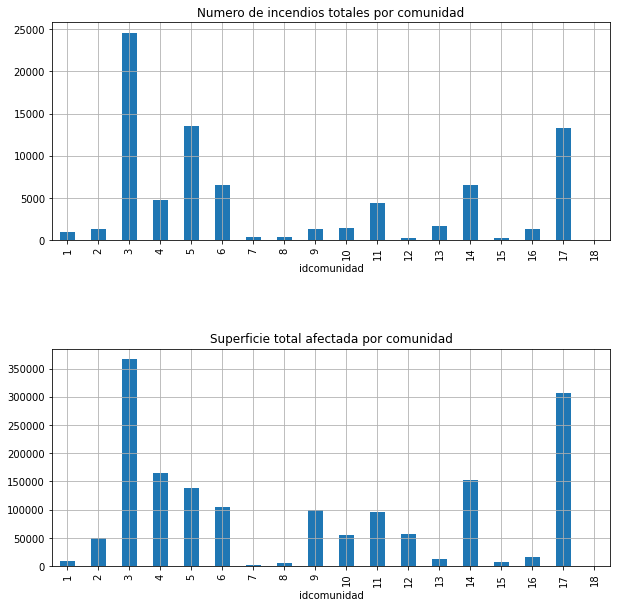

In [49]:
fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(10,10))
plt.subplots_adjust(wspace=None, hspace=0.5)

tab_Fabs.plot(ax=axes[0],kind="bar",legend=False,grid=True,title="Numero de incendios totales por comunidad")
tabsup_com.plot(ax=axes[1],kind="bar",legend=False,grid=True,title="Superficie total afectada por comunidad")


## Incendios por año:

In [ ]:
c1=0
c2=0
c3=0
c4=0
c5=0
c6=0
c7=0
c8=0
c9=0
c10=0
c11=0
c12=0
c13=0
c14=0
c15=0
for i in range(len(df)):
    if df["year"][i]==2001:
        c1+=1
    if df["year"][i]==2002:
        c2+=1
    if df["year"][i]==2003:
        c3+=1
    if df["year"][i]==2004:
        c4+=1
    if df["year"][i]==2005:
        c5+=1
    if df["year"][i]==2006:
        c6+=1
    if df["year"][i]==2007:
        c7+=1
    if df["year"][i]==2008:
        c8+=1
    if df["year"][i]==2009:
        c9+=1
    if df["year"][i]==2010:
        c10+=1
    if df["year"][i]==2011:
        c11+=1
    if df["year"][i]==2012:
        c12+=1
    if df["year"][i]==2013:
        c13+=1
    if df["year"][i]==2014:
        c14+=1
    if df["year"][i]==2015:
        c15+=1
array=[c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15]
posiciones=np.cumsum(array)

In [114]:
posiciones

array([ 6923, 14738, 21368, 29013, 38029, 43619, 47029, 51382, 57158,
       61068, 66667, 72207, 75296, 78492, 82616])

In [50]:
df2001=df[0:6923]
df2002=df[6923:14738]
df2003=df[14738:21368]
df2004=df[21368:29013]
df2005=df[29013:38029]
df2006=df[38029:43619]
df2007=df[43619:47029]
df2008=df[47029:51382]
df2009=df[51382:57158]
df2010=df[57158:61068]
df2011=df[61068:66667]
df2012=df[66667:72207]
df2013=df[72207:75296]
df2014=df[75296:78492]
df2015=df[78492::]
array=[df2001,df2002,df2003,df2004,df2005,df2006,df2007,df2008,df2009,df2010,df2011,df2012,df2013,df2014,df2015]

In [51]:
x=np.arange(2001,2016)

In [52]:
inc=[]
for i in array:
    inc.append(i["superficie"].count())

In [53]:
sup=[]
for i in array:
    sup.append(i["superficie"].sum())

Text(0.5, 1.0, 'Num incendios por año')

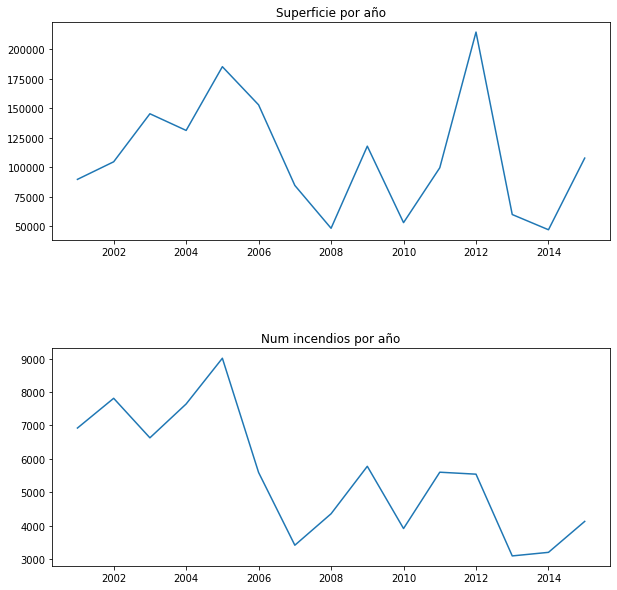

In [54]:
fig,(ax1,ax2) = plt.subplots(2)
fig.set_size_inches(10, 10)
plt.subplots_adjust(wspace=None, hspace=0.5)

ax1.plot(x, sup)
ax1.set_title('Superficie por año')

ax2.plot(x, inc)
ax2.set_title('Num incendios por año')

In [55]:
tab_2001=pd.crosstab(index=df2001["fecha"],
                columns= "incendios totales 2001")
tab_2002=pd.crosstab(index=df2002["fecha"],
                columns= "incendios totales 2002")
tab_2003=pd.crosstab(index=df2003["fecha"],
                columns= "incendios totales 2003")
tab_2004=pd.crosstab(index=df2004["fecha"],
                columns= "incendios totales 2004")
tab_2005=pd.crosstab(index=df2005["fecha"],
                columns= "incendios totales 2005")
tab_2006=pd.crosstab(index=df2006["fecha"],
                columns= "incendios totales 2006")
tab_2007=pd.crosstab(index=df2007["fecha"],
                columns= "incendios totales 2007")
tab_2008=pd.crosstab(index=df2008["fecha"],
                columns= "incendios totales 2008")
tab_2009=pd.crosstab(index=df2009["fecha"],
                columns= "incendios totales 2009")
tab_2010=pd.crosstab(index=df2010["fecha"],
                columns= "incendios totales 2010")
tab_2011=pd.crosstab(index=df2011["fecha"],
                columns= "incendios totales 2011")
tab_2012=pd.crosstab(index=df2012["fecha"],
                columns= "incendios totales 2012")
tab_2013=pd.crosstab(index=df2013["fecha"],
                columns= "incendios totales 2013")
tab_2014=pd.crosstab(index=df2014["fecha"],
                columns= "incendios totales 2014")
tab_2015=pd.crosstab(index=df2015["fecha"],
                columns= "incendios totales 2015")

In [56]:
frames=[tab_2001,tab_2002,tab_2003,tab_2004,tab_2005,tab_2006,tab_2007,tab_2008,tab_2009,tab_2010,tab_2011,tab_2012,tab_2013,tab_2014,tab_2015]

In [57]:
a=tab_2001.iloc[:,0].tolist()
b=tab_2002.iloc[:,0].tolist()
c=tab_2003.iloc[:,0].tolist()
d=tab_2004.iloc[:,0].tolist()
e=tab_2005.iloc[:,0].tolist()
f=tab_2006.iloc[:,0].tolist()
g=tab_2007.iloc[:,0].tolist()
h=tab_2008.iloc[:,0].tolist()
i=tab_2009.iloc[:,0].tolist()
j=tab_2010.iloc[:,0].tolist()
k=tab_2011.iloc[:,0].tolist()
l=tab_2012.iloc[:,0].tolist()
m=tab_2013.iloc[:,0].tolist()
n=tab_2014.iloc[:,0].tolist()
o=tab_2015.iloc[:,0].tolist()

In [58]:
a=df2001.groupby("month").count()
a=a["superficie"].tolist()

b=df2002.groupby("month").count()
b=b["superficie"].tolist()

c=df2003.groupby("month").count()
c=c["superficie"].tolist()

d=df2004.groupby("month").count()
d=d["superficie"].tolist()
    
e=df2005.groupby("month").count() 
e=e["superficie"].tolist()

f=df2006.groupby("month").count()
f=f["superficie"].tolist()

g=df2007.groupby("month").count()
g=g["superficie"].tolist()

h=df2008.groupby("month").count()
h=h["superficie"].tolist()

i=df2009.groupby("month").count()
i=i["superficie"].tolist()

j=df2010.groupby("month").count()
j=j["superficie"].tolist()

k=df2011.groupby("month").count()
k=k["superficie"].tolist()

l=df2012.groupby("month").count()
l=l["superficie"].tolist()

m=df2013.groupby("month").count()
m=m["superficie"].tolist()

n=df2014.groupby("month").count()
n=n["superficie"].tolist()

o=df2015.groupby("month").count()
o=o["superficie"].tolist()

In [59]:
frame_inc=pd.DataFrame({"2001":a,
                      "2002":b,
                       "2003":c,
                       "2004":d,
                       "2005":e,
                       "2006":f,
                       "2007":g,
                       "2008":h,
                       "2009":i,
                       "2010":j,
                       "2011":k,
                       "2012":l,
                       "2013":m,
                       "2014":n,
                       "2015":o})

**Incendios mes/año:**

In [60]:
frame_inc.rename(index={0:'Enero', 1:"Febrero",2:"Marzo",3:"Abril",4:"Mayo",5:"Junio",6:"Julio",7:"Agosto",8:"Septiembre",9:"Octubre",10:"Noviembre",11:"Diciembre"}, inplace=True)
frame_inc

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Enero,59,686,54,116,523,91,203,424,93,22,133,168,69,192,111
Febrero,306,1075,120,1126,970,567,135,1430,754,351,582,1087,76,357,69
Marzo,238,1287,1148,675,2258,711,404,627,1965,957,693,2045,225,860,487
Abril,433,829,582,914,568,343,234,343,413,550,722,210,315,219,579
Mayo,305,156,325,288,479,400,165,91,343,159,116,216,97,341,282
Junio,778,509,641,851,629,477,143,88,267,160,346,275,171,254,315
Julio,852,902,737,1240,937,930,437,288,489,326,467,345,394,263,526
Agosto,997,1417,1748,849,1479,1298,401,427,476,738,499,487,625,301,503
Septiembre,1456,752,1148,685,570,535,321,275,566,381,555,454,620,231,243
Octubre,262,118,86,590,469,113,193,217,267,209,1337,93,172,119,104


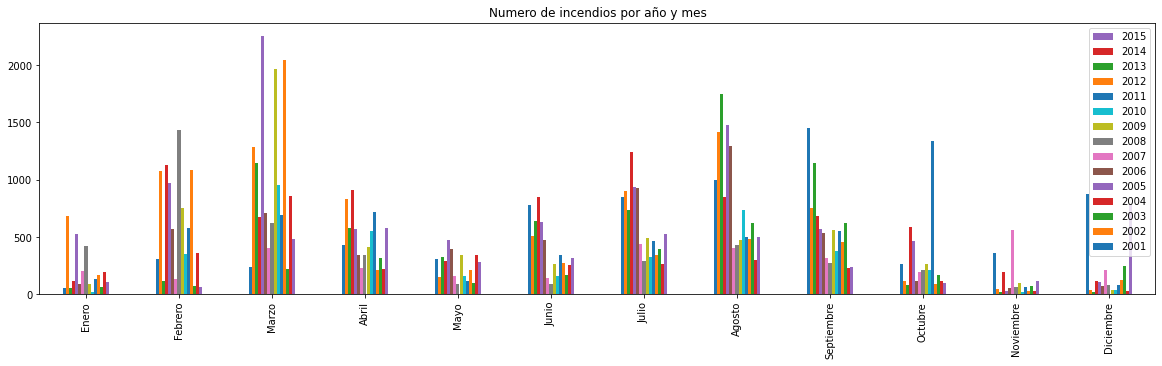

In [61]:
frame_inc.plot(kind="bar",figsize=(20,5),legend="reverse",title="Numero de incendios por año y mes")

In [62]:
a=df2001.groupby("month").sum()
a=a["superficie"].tolist()

b=df2002.groupby("month").sum()
b=b["superficie"].tolist()

c=df2003.groupby("month").sum()
c=c["superficie"].tolist()

d=df2004.groupby("month").sum()
d=d["superficie"].tolist()
    
e=df2005.groupby("month").sum() 
e=e["superficie"].tolist()

f=df2006.groupby("month").sum()
f=f["superficie"].tolist()

g=df2007.groupby("month").sum()
g=g["superficie"].tolist()

h=df2008.groupby("month").sum()
h=h["superficie"].tolist()

i=df2009.groupby("month").sum()
i=i["superficie"].tolist()

j=df2010.groupby("month").sum()
j=j["superficie"].tolist()

k=df2011.groupby("month").sum()
k=k["superficie"].tolist()

l=df2012.groupby("month").sum()
l=l["superficie"].tolist()

m=df2013.groupby("month").sum()
m=m["superficie"].tolist()

n=df2014.groupby("month").sum()
n=n["superficie"].tolist()

o=df2015.groupby("month").sum()
o=o["superficie"].tolist()

In [63]:
frame_sup=pd.DataFrame({"2001":a,
                      "2002":b,
                       "2003":c,
                       "2004":d,
                       "2005":e,
                       "2006":f,
                       "2007":g,
                       "2008":h,
                       "2009":i,
                       "2010":j,
                       "2011":k,
                       "2012":l,
                       "2013":m,
                       "2014":n,
                       "2015":o})

In [64]:
frame_sup.rename(index={0:'Enero', 1:"Febrero",2:"Marzo",3:"Abril",4:"Mayo",5:"Junio",6:"Julio",7:"Agosto",8:"Septiembre",9:"Octubre",10:"Noviembre",11:"Diciembre"}, inplace=True)
frame_sup

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Enero,337.44,12834.57,1041.73,578.65,4788.22,416.97,1131.11,3344.27,2033.45,100.07,1770.84,3989.34,559.80,2253.23,779.96
Febrero,1355.73,19564.26,556.00,7947.00,7414.07,5575.43,791.06,19205.91,5670.37,4222.43,7752.99,15891.15,650.33,4980.14,302.91
Marzo,1393.89,10300.93,8377.07,3993.28,20236.78,8700.42,3843.09,3725.77,22323.62,10160.44,7120.36,39478.79,2750.69,13850.84,4525.15
Abril,2210.60,6167.46,3579.65,6104.07,3584.26,3448.64,1414.63,4401.78,3859.29,3714.49,10899.66,1100.82,2963.70,3601.56,7193.47
Mayo,1760.51,1237.08,1654.42,1691.34,3517.25,4871.35,1061.64,424.15,2940.75,1298.31,2216.75,4959.22,1102.39,3227.51,4060.85
Junio,12957.08,8374.21,7742.82,18024.85,11875.97,4296.14,1360.59,949.91,4597.60,719.15,3835.01,53881.39,1598.30,3297.63,3918.93
Julio,14852.17,12480.64,17574.97,53921.66,43155.59,14618.63,45982.81,2940.73,48751.05,4155.53,5916.85,29053.09,11946.64,7153.21,36662.29
Agosto,26355.03,23243.05,91183.37,25118.61,62135.75,96951.44,14703.54,8521.40,13644.48,17334.66,6704.39,48052.68,17075.14,4037.40,17616.89
Septiembre,12857.99,6692.67,13068.35,6791.77,15587.86,12123.52,3125.24,2387.71,11378.83,9135.44,7347.46,14893.46,14968.89,3201.05,2034.48
Octubre,1795.72,858.29,410.05,5100.65,11552.09,729.61,1148.29,1122.25,1623.89,2015.63,43677.27,457.73,1829.35,911.62,640.24


**Superficie mes-año:**

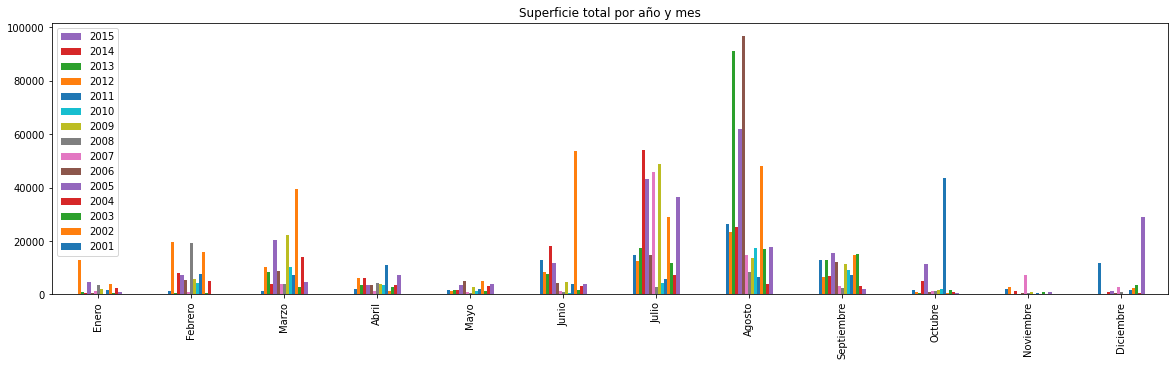

In [65]:
frame_sup.plot(kind="bar",figsize=(20,5),legend="reverse",title="Superficie total por año y mes")

In [66]:
t2001=frame_inc["2001"]
t2002=frame_inc["2002"]
t2003=frame_inc["2003"]
t2004=frame_inc["2004"]
t2005=frame_inc["2005"]
t2006=frame_inc["2006"]
t2007=frame_inc["2007"]
t2008=frame_inc["2008"]
t2009=frame_inc["2009"]
t2010=frame_inc["2010"]
t2011=frame_inc["2011"]
t2012=frame_inc["2012"]
t2013=frame_inc["2013"]
t2014=frame_inc["2014"]
t2015=frame_inc["2015"]

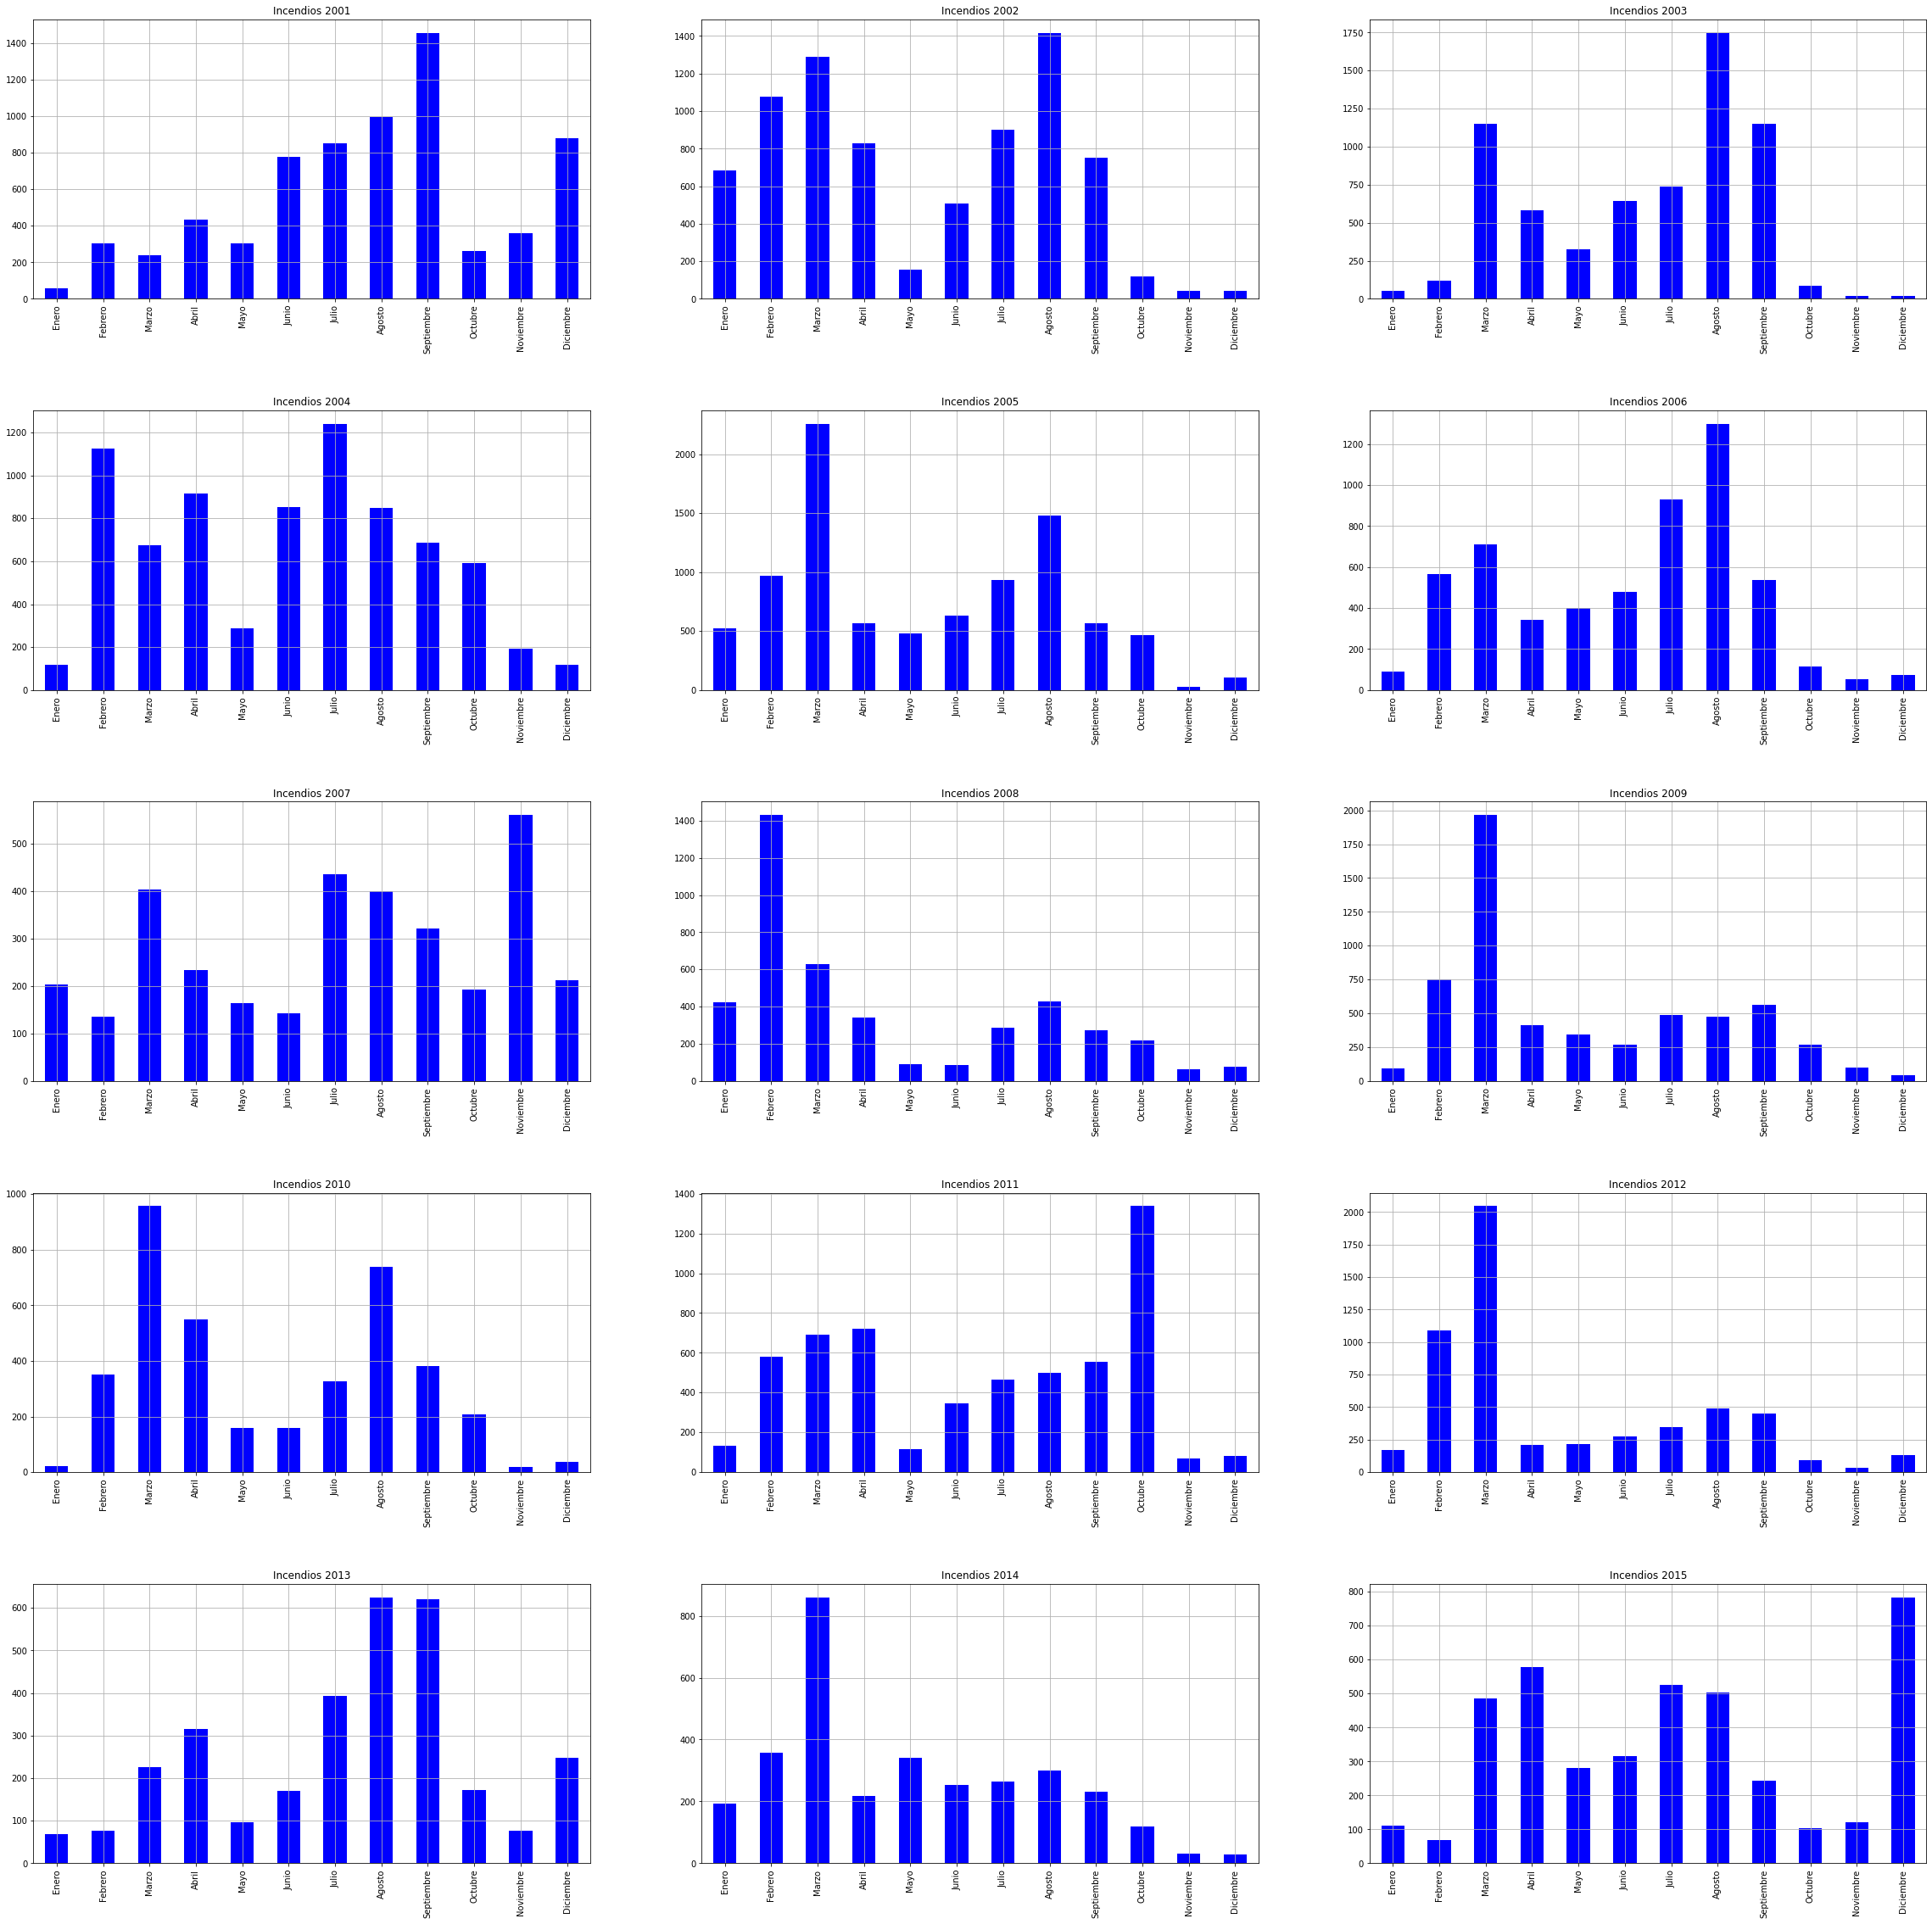

In [264]:
fig, axes = plt.subplots(nrows=5, ncols=3,figsize=(40,40))
plt.subplots_adjust(wspace=None, hspace=0.4)
t2001.plot(ax=axes[0,0],kind="bar",color="blue",title="Incendios 2001",grid=True,legend=False,stacked=True)
t2002.plot(ax=axes[0,1],kind="bar",color="blue",title="Incendios 2002",grid=True,legend=False,stacked=True)
t2003.plot(ax=axes[0,2],kind="bar",color="blue",title="Incendios 2003",grid=True,legend=False,stacked=True)
t2004.plot(ax=axes[1,0],kind="bar",color="blue",title="Incendios 2004",grid=True,legend=False,stacked=True)
t2005.plot(ax=axes[1,1],kind="bar",color="blue",title="Incendios 2005",grid=True,legend=False,stacked=True)
t2006.plot(ax=axes[1,2],kind="bar",color="blue",title="Incendios 2006",grid=True,legend=False,stacked=True)
t2007.plot(ax=axes[2,0],kind="bar",color="blue",title="Incendios 2007",grid=True,legend=False,stacked=True)
t2008.plot(ax=axes[2,1],kind="bar",color="blue",title="Incendios 2008",grid=True,legend=False,stacked=True)
t2009.plot(ax=axes[2,2],kind="bar",color="blue",title="Incendios 2009",grid=True,legend=False,stacked=True)
t2010.plot(ax=axes[3,0],kind="bar",color="blue",title="Incendios 2010",grid=True,legend=False,stacked=True)
t2011.plot(ax=axes[3,1],kind="bar",color="blue",title="Incendios 2011",grid=True,legend=False,stacked=True)
t2012.plot(ax=axes[3,2],kind="bar",color="blue",title="Incendios 2012",grid=True,legend=False,stacked=True)
t2013.plot(ax=axes[4,0],kind="bar",color="blue",title="Incendios 2013",grid=True,legend=False,stacked=True)
t2014.plot(ax=axes[4,1],kind="bar",color="blue",title="Incendios 2014",grid=True,legend=False,stacked=True)
t2015.plot(ax=axes[4,2],kind="bar",color="blue",title="Incendios 2015",grid=True,legend=False,stacked=True)



In [67]:
def sup_mes(df):
    df_sup=df.groupby("fecha").sum()
    df_sup=df_sup["superficie"]
    return df_sup

In [68]:
df_sup01=sup_mes(df2001)
df_sup02=sup_mes(df2002)
df_sup03=sup_mes(df2003)
df_sup04=sup_mes(df2004)
df_sup05=sup_mes(df2005)
df_sup06=sup_mes(df2006)
df_sup07=sup_mes(df2007)
df_sup08=sup_mes(df2008)
df_sup09=sup_mes(df2009)
df_sup10=sup_mes(df2010)
df_sup11=sup_mes(df2011)
df_sup12=sup_mes(df2012)
df_sup13=sup_mes(df2013)
df_sup14=sup_mes(df2014)
df_sup15=sup_mes(df2015)

In [69]:
a=df_sup01.tolist()
b=df_sup02.tolist()
c=df_sup03.tolist()
d=df_sup04.tolist()
e=df_sup05.tolist()
f=df_sup06.tolist()
g=df_sup07.tolist()
h=df_sup08.tolist()
i=df_sup09.tolist()
j=df_sup10.tolist()
k=df_sup11.tolist()
l=df_sup12.tolist()
m=df_sup13.tolist()
n=df_sup14.tolist()
o=df_sup15.tolist()

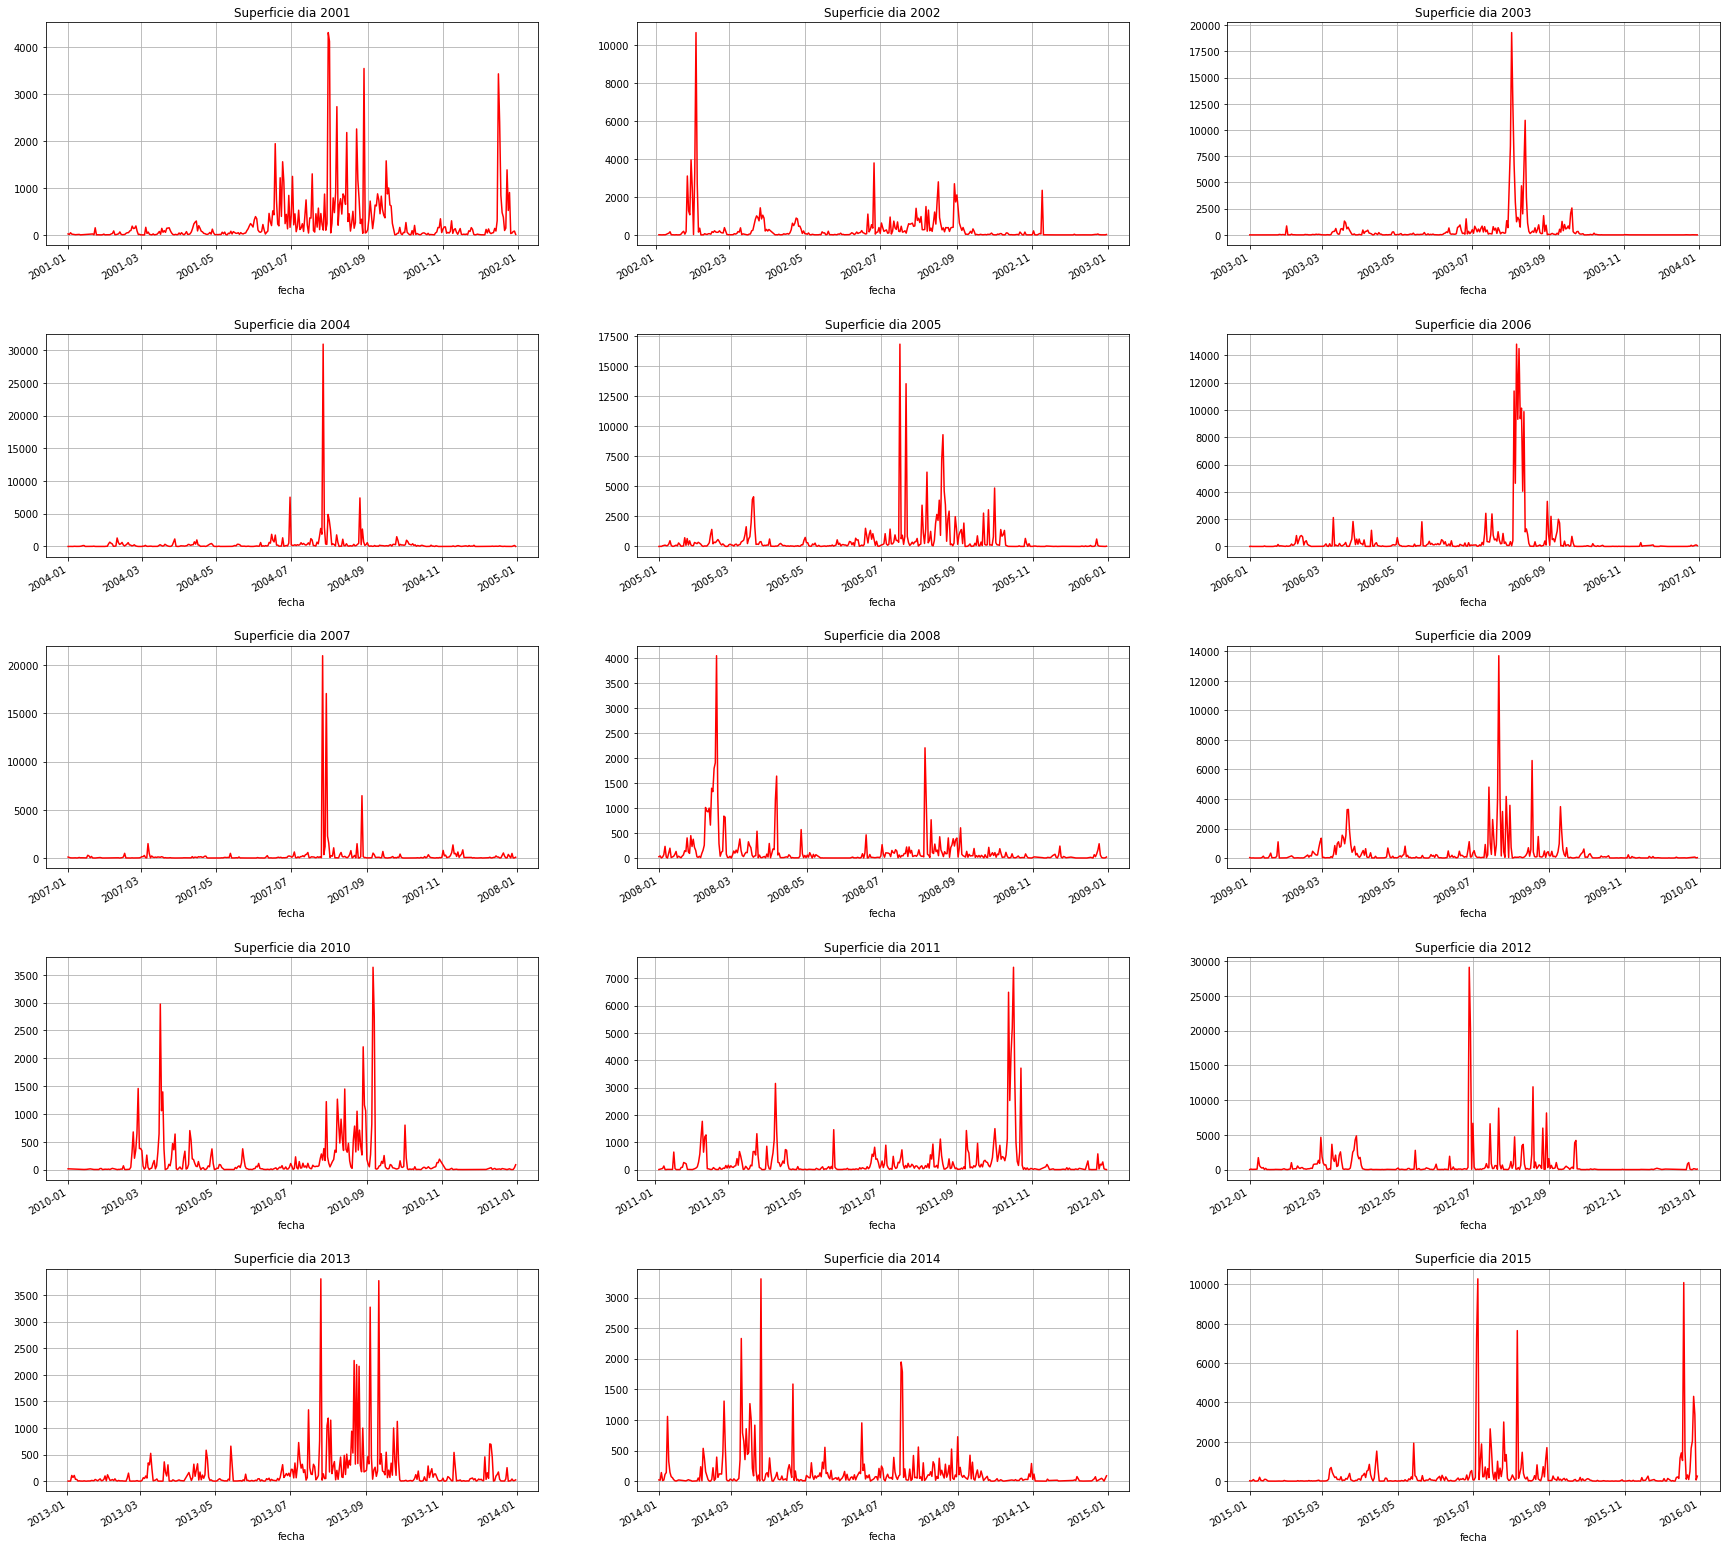

In [70]:
fig, axes = plt.subplots(nrows=5, ncols=3,figsize=(30,30))

plt.subplots_adjust(wspace=None, hspace=0.4)
df_sup01.plot(ax=axes[0,0],x="fecha",y="superficie",grid=True,color="red",title="Superficie dia 2001")
df_sup02.plot(ax=axes[0,1],x="fecha",y="superficie",grid=True,color="red",title="Superficie dia 2002")
df_sup03.plot(ax=axes[0,2],x="fecha",y="superficie",grid=True,color="red",title="Superficie dia 2003")
df_sup04.plot(ax=axes[1,0],x="fecha",y="superficie",grid=True,color="red",title="Superficie dia 2004")
df_sup05.plot(ax=axes[1,1],x="fecha",y="superficie",grid=True,color="red",title="Superficie dia 2005")
df_sup06.plot(ax=axes[1,2],x="fecha",y="superficie",grid=True,color="red",title="Superficie dia 2006")
df_sup07.plot(ax=axes[2,0],x="fecha",y="superficie",grid=True,color="red",title="Superficie dia 2007")
df_sup08.plot(ax=axes[2,1],x="fecha",y="superficie",grid=True,color="red",title="Superficie dia 2008")
df_sup09.plot(ax=axes[2,2],x="fecha",y="superficie",grid=True,color="red",title="Superficie dia 2009")
df_sup10.plot(ax=axes[3,0],x="fecha",y="superficie",grid=True,color="red",title="Superficie dia 2010")
df_sup11.plot(ax=axes[3,1],x="fecha",y="superficie",grid=True,color="red",title="Superficie dia 2011")
df_sup12.plot(ax=axes[3,2],x="fecha",y="superficie",grid=True,color="red",title="Superficie dia 2012")
df_sup13.plot(ax=axes[4,0],x="fecha",y="superficie",grid=True,color="red",title="Superficie dia 2013")
df_sup14.plot(ax=axes[4,1],x="fecha",y="superficie",grid=True,color="red",title="Superficie dia 2014")
df_sup15.plot(ax=axes[4,2],x="fecha",y="superficie",grid=True,color="red",title="Superficie dia 2015")


In [245]:
dfx=df_meses_sup.transpose()
dfx=dfx[1::]
dfx

,0,1,2,3,4,5,6,7,8,9,10,11
2001,337.44,1355.73,1393.89,2210.6,1760.51,12957.1,14852.2,26355,12858,1795.72,2092.39,11822.9
2002,12834.6,19564.3,10300.9,6167.46,1237.08,8374.21,12480.6,23243.1,6692.67,858.29,2728.4,192.82
2003,1041.73,556,8377.07,3579.65,1654.42,7742.82,17575,91183.4,13068.4,410.05,64.75,62.27
2004,578.65,7947,3993.28,6104.07,1691.34,18024.9,53921.7,25118.6,6791.77,5100.65,1205.72,733.1
2005,4788.22,7414.07,20236.8,3584.26,3517.25,11876,43155.6,62135.7,15587.9,11552.1,190.22,1116.51
2006,416.97,5575.43,8700.42,3448.64,4871.35,4296.14,14618.6,96951.4,12123.5,729.61,599.56,496.92
2007,1131.11,791.06,3843.09,1414.63,1061.64,1360.59,45982.8,14703.5,3125.24,1148.29,7299.49,2795.44
2008,3344.27,19205.9,3725.77,4401.78,424.15,949.91,2940.73,8521.4,2387.71,1122.25,608.29,776.93
2009,2033.45,5670.37,22323.6,3859.29,2940.75,4597.6,48751.1,13644.5,11378.8,1623.89,819.74,240.26
2010,100.07,4222.43,10160.4,3714.49,1298.31,719.15,4155.53,17334.7,9135.44,2015.63,53.77,266.39


In [246]:
ene=dfx[0].tolist()
feb=dfx[1].tolist()
mar=dfx[2].tolist()
abr=dfx[3].tolist()
may=dfx[4].tolist()
jun=dfx[5].tolist()
jul=dfx[6].tolist()
ago=dfx[7].tolist()
sep=dfx[8].tolist()
oc=dfx[9].tolist()
nov=dfx[10].tolist()
dic=dfx[11].tolist()
y=np.arange(1,16)

In [247]:
y=np.arange(2001,2016)
y

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015])

In [248]:
ene

[337.44,
 12834.570000000003,
 1041.73,
 578.65,
 4788.220000000002,
 416.97,
 1131.1100000000004,
 3344.2699999999973,
 2033.4500000000003,
 100.07000000000001,
 1770.84,
 3989.34,
 559.8000000000001,
 2253.229999999999,
 779.9599999999999]

Text(0, 0.5, 'Años')

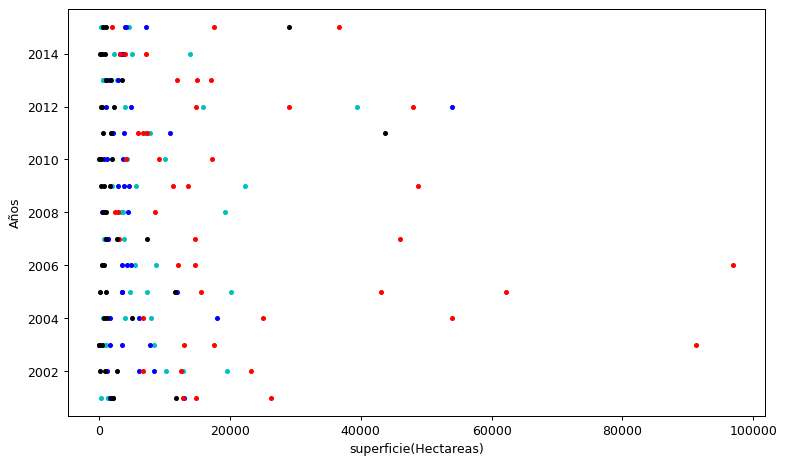

In [249]:
plt.figure(figsize=(10,6),dpi=90)
plt.subplot(1,1,1)
plt.plot(ene,y,"c.",feb,y,"c.",mar,y,"c.",abr,y,"b.",may,y,"b.",jun,y,"b.",jul,y,"r.",ago,y,"r.",sep,y,"r.",oc,y,"k.",nov,y,"k.",dic,y,"k.")
plt.xlabel("superficie(Hectareas)")
plt.ylabel("Años")



### Incendios por causas:

* 1:Rayos
* 2:Negligencias
* 3: Intencionados
* 4: Otras causas/accidentales
* 5: Incendio reproducido
* 6: Causa desconocida

In [103]:
df["causa"].unique()

array([4, 2, 5, 3, 1, 6])

In [104]:
df["causa"]=pd.Categorical(df["causa"])
tab_Fabs= pd.crosstab(index=df["causa"],
                columns= "incendios totales 2001-2015")

tab_Fabs

col_0,incendios totales 2001-2015
causa,
1,1895
2,14626
3,3997
4,49595
5,11253
6,1250


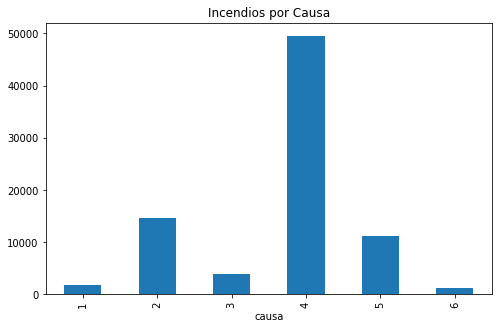

In [105]:
tab_Fabs.plot(kind="bar",figsize=(8,5),legend=False,title="Incendios por Causa")

In [77]:
tab_Frel=(tab_Fabs/tab_Fabs.sum())
tab_Frel

col_0,incendios totales 2001-2015
causa,
1,0.022937
2,0.177036
3,0.048380
4,0.600307
5,0.136208
6,0.015130


## REGRESSION SUPERFICIE VS FEATURE COLS

In [148]:
#Creo dummies fecha:
dummy_fecha= pd.get_dummies(df["fecha"], prefix="fecha")

In [149]:
#Concateno dummies con dfll(Mis feature cols):
dfll=df[["superficie","lat","month","year","time_ctrl","time_ext"]].join(dummy_fecha)

**Wrangling:**

In [287]:
def remove_outlier(df_in, col_name):
       q1 = df_in[col_name].quantile(0.25)
       q3 = df_in[col_name].quantile(0.75)
       iqr = q3-q1 #Interquartile range
       fence_low  = q1-1.5*iqr
       fence_high = q3+1.5*iqr
       df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
       return df_out

In [150]:
#LATITUD:
#Elimino latitudes que no coinciden con P.I
dfll= dfll.drop(dfll[dfll['lat']>43.0].index)
dfll= dfll.reset_index(drop=True)
dfll= dfll.drop(dfll[dfll['lat']<36.0].index)
dfll= dfll.reset_index(drop=True)

In [289]:
#TIME EXT:
dfll=dfll.drop(dfll[dfll['time_ext']<10.0].index)
dfll=dfll.drop(dfll[dfll["time_ext"]>100000].index)
#dfll=remove_outlier(dfll,"time_ext")
#dfll= dfll.reset_index(drop=True)


In [290]:
#TIME CTRL:
dfll=dfll.drop(dfll[dfll['time_ctrl']<10.0].index)
dfll=dfll.drop(dfll[dfll["time_ctrl"]>30000].index)
#dfll=remove_outlier(dfll,"time_ctrl")
#dfll= dfll.reset_index(drop=True)

## SUPERFICIE TOTAL :

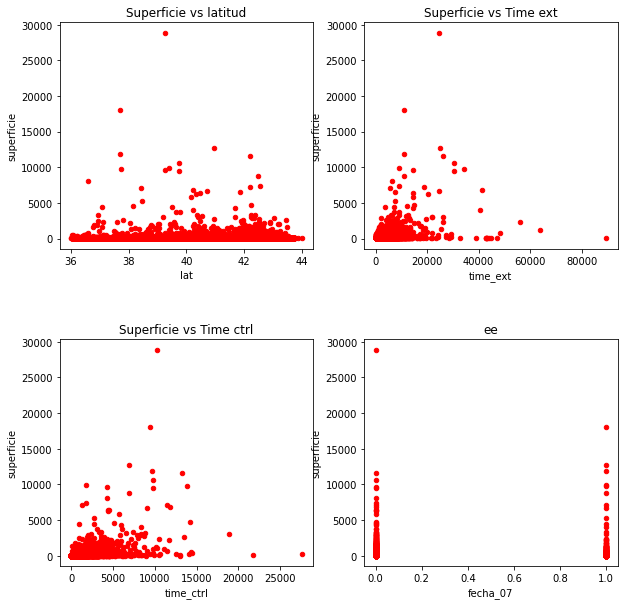

In [291]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(10,10))

plt.subplots_adjust(wspace=None, hspace=0.4)
dfll.plot(ax=axes[0,0],kind="scatter",x="lat",y="superficie",color="red",title="Superficie vs latitud")
dfll.plot(ax=axes[0,1],kind="scatter",x="time_ext",y="superficie",color="red",title="Superficie vs Time ext")
dfll.plot(ax=axes[1,0],kind="scatter",x="time_ctrl",y="superficie",color="red",title="Superficie vs Time ctrl"),
dfll.plot(ax=axes[1,1],kind="scatter",x="fecha_07",y="superficie",color="red",title="ee")

* La mayoria de los incendios estan entre 1 y 7 hectareas
* **Hay que separar por franjas de superficie**

## INTERCUARTILE RANGE SUPERFICIE :

In [292]:
#Me quedo con el Intercuartile range de superficie:
dfll_rem=remove_outlier(dfll,"superficie")

In [293]:
dfll_rem=remove_outlier(dfll,"time_ext")

In [294]:
dfll_rem=remove_outlier(dfll_rem,"time_ctrl")

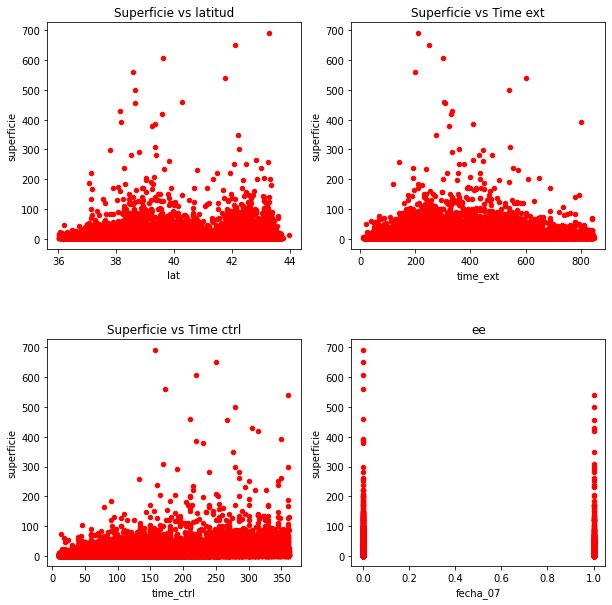

In [295]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(10,10))

plt.subplots_adjust(wspace=None, hspace=0.4)
dfll_rem.plot(ax=axes[0,0],kind="scatter",x="lat",y="superficie",color="red",title="Superficie vs latitud")
dfll_rem.plot(ax=axes[0,1],kind="scatter",x="time_ext",y="superficie",color="red",title="Superficie vs Time ext")
dfll_rem.plot(ax=axes[1,0],kind="scatter",x="time_ctrl",y="superficie",color="red",title="Superficie vs Time ctrl"),
dfll_rem.plot(ax=axes[1,1],kind="scatter",x="fecha_07",y="superficie",color="red",title="ee")

**LINEAR REGRESSION INTERQUARTILE RANGE:**

In [296]:
from sklearn.linear_model import LinearRegression

In [297]:
feature_cols=["lat","time_ext","time_ctrl","fecha_07","fecha_08","fecha_09"]

In [298]:
X= dfll_rem[feature_cols]
Y= Y= dfll_rem["superficie"]

In [299]:
lm= LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [300]:
print(lm.intercept_)
print(lm.coef_)

25.73873446262361
[-0.64845599  0.0048954   0.04284548  1.28520336  0.10422418 -0.47388228]


In [301]:
lm.score(X,Y)

0.07665651862196265

In [302]:
def feature_opcions(df,feature_cols):
    feature_opcions=[]
    for f in feature_cols:
        feature_opcions.append(f)
        X= df[feature_opcions]
        lm=LinearRegression()
        lm.fit(X,Y)
        print(feature_opcions,"SCORE: ",lm.score(X,Y))
    
    

In [303]:
feature_opcions(dfll_rem,feature_cols)

['lat'] SCORE:  0.0019090013142490925
['lat', 'time_ext'] SCORE:  0.04271801217490978
['lat', 'time_ext', 'time_ctrl'] SCORE:  0.07556675065161056
['lat', 'time_ext', 'time_ctrl', 'fecha_07'] SCORE:  0.07651846509817861
['lat', 'time_ext', 'time_ctrl', 'fecha_07', 'fecha_08'] SCORE:  0.07654202161640034
['lat', 'time_ext', 'time_ctrl', 'fecha_07', 'fecha_08', 'fecha_09'] SCORE:  0.07665651862196265


El lm.score es muy bajo en todos los casos

**POLYNOMIAL REGRESSION INTERQUARTILE RANGE:**

In [304]:
from sklearn.preprocessing import PolynomialFeatures 

In [305]:
feature_cols=["lat","time_ext","time_ctrl"]

**Latitud vs superficie:**

In [306]:
X=dfll_rem["lat"]
y=dfll_rem["superficie"]

In [307]:
X=(np.array(X)).reshape(-1,1)
y=(np.array(y)).reshape(-1,1)

In [308]:
poli_reg = PolynomialFeatures(degree = 2)

In [309]:
X_poli = poli_reg.fit_transform(X)

In [310]:
pr = LinearRegression()

In [311]:
pr.fit(X_poli, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [312]:
Y_pred = pr.predict(X_poli)

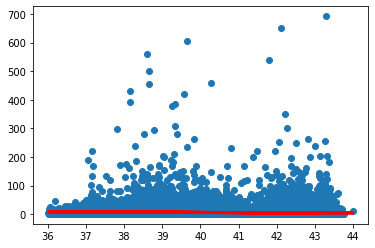

In [313]:
plt.scatter(X, y)
plt.plot(X, Y_pred, color='red', linewidth=3)
plt.show()

In [314]:
pr.score(X_poli,y)

0.0019334062577346376

**Time_ext vs superficie:**

In [315]:
X=dfll_rem["time_ext"]
y=dfll_rem["superficie"]
X=(np.array(X)).reshape(-1,1)
y=(np.array(y)).reshape(-1,1)

In [316]:
poli_reg = PolynomialFeatures(degree = 2)

In [317]:
X_poli = poli_reg.fit_transform(X)

In [318]:
pr = LinearRegression()

In [319]:
pr.fit(X_poli, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [320]:
Y_pred = pr.predict(X_poli)

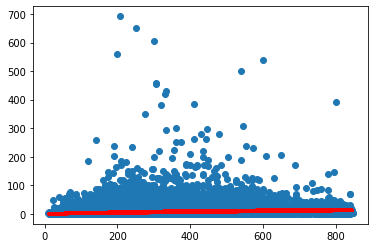

In [321]:
plt.scatter(X, y)
plt.plot(X, Y_pred, color='red', linewidth=3)
plt.show()

In [322]:
pr.score(X_poli,y)

0.04362529717674879

**Time_ctrl vs superficie:**

In [323]:
X=dfll_rem["time_ctrl"]
y=dfll_rem["superficie"]
X=(np.array(X)).reshape(-1,1)
y=(np.array(y)).reshape(-1,1)

In [324]:
poli_reg = PolynomialFeatures(degree = 2)

In [325]:
X_poli = poli_reg.fit_transform(X)

In [326]:
pr = LinearRegression()

In [327]:
pr.fit(X_poli, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

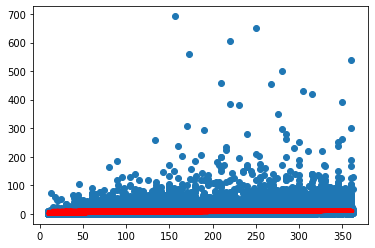

In [328]:
plt.scatter(X, y)
plt.plot(X, Y_pred, color='red', linewidth=3)
plt.show()

In [329]:
pr.score(X_poli,y)

0.0685028554930256

No hay ninguna relacion, hay que separar por franjas de superficie

## SUPERFICIE>1000:

In [330]:
#Filtro superficies mayores de 1000
dfll_h= dfll.drop(dfll[dfll["superficie"]<1750].index)
dfll_h= dfll_h.reset_index(drop=True)

In [331]:
#Filtro time_ext<30000:
dfll_h= dfll_h.drop(dfll_h[dfll_h["time_ext"]>30000].index)

In [332]:
#Filtro time_ext<10000:
dfll_h= dfll_h.drop(dfll_h[dfll_h["time_ctrl"]>15000].index)

In [333]:
dfll_h["superficie"].describe()

count       72.000000
mean      4426.695833
std       4277.070577
min       1759.280000
25%       2117.025000
50%       2788.520000
75%       4789.320000
max      28879.100000
Name: superficie, dtype: float64

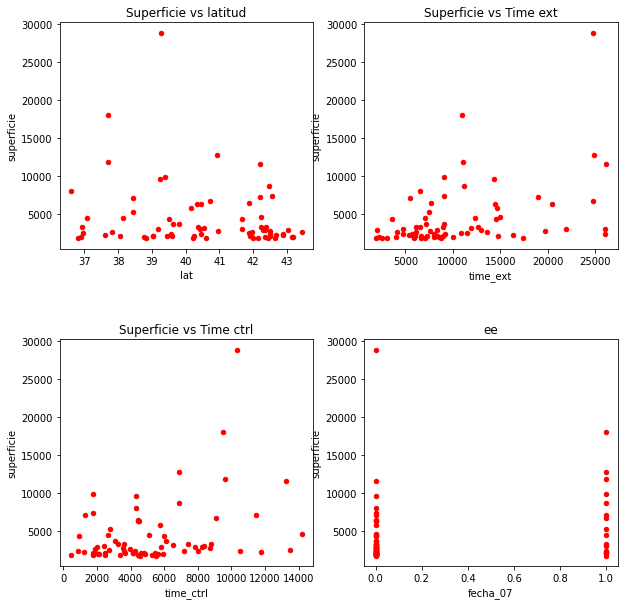

In [334]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(10,10))

plt.subplots_adjust(wspace=None, hspace=0.4)
dfll_h.plot(ax=axes[0,0],kind="scatter",x="lat",y="superficie",color="red",title="Superficie vs latitud")
dfll_h.plot(ax=axes[0,1],kind="scatter",x="time_ext",y="superficie",color="red",title="Superficie vs Time ext")
dfll_h.plot(ax=axes[1,0],kind="scatter",x="time_ctrl",y="superficie",color="red",title="Superficie vs Time ctrl"),
dfll_h.plot(ax=axes[1,1],kind="scatter",x="fecha_07",y="superficie",color="red",title="ee")

In [335]:
feature_cols=["lat","time_ctrl","time_ext","fecha_07","fecha_08","fecha_09"]

In [336]:
X= dfll_h[feature_cols]
Y= Y= dfll_h["superficie"]

In [337]:
lm= LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [338]:
print(lm.intercept_)
print(lm.coef_)

25484.25357404336
[-6.07569460e+02  2.30040257e-01  2.10843751e-01  4.99895158e+02
  2.18824378e+02 -1.01513753e+03]


In [339]:
lm.score(X,Y)

0.26225818328708217

In [340]:
feature_opcions(dfll_h,feature_cols)

['lat'] SCORE:  0.034819186528602386
['lat', 'time_ctrl'] SCORE:  0.19918991039374956
['lat', 'time_ctrl', 'time_ext'] SCORE:  0.2537116811816833
['lat', 'time_ctrl', 'time_ext', 'fecha_07'] SCORE:  0.2555865465491992
['lat', 'time_ctrl', 'time_ext', 'fecha_07', 'fecha_08'] SCORE:  0.2586505993310505
['lat', 'time_ctrl', 'time_ext', 'fecha_07', 'fecha_08', 'fecha_09'] SCORE:  0.26225818328708217


**POLYNOMIAL REGRESSION SUPERFICIE >1000:**

**Latitud vs superficie:**

In [341]:
X=dfll_h["lat"]
y=dfll_h["superficie"]
X=(np.array(X)).reshape(-1,1)
y=(np.array(y)).reshape(-1,1)
poli_reg = PolynomialFeatures(degree = 2)
X_poli = poli_reg.fit_transform(X)
pr = LinearRegression()
pr.fit(X_poli, y)
Y_pred = pr.predict(X_poli)

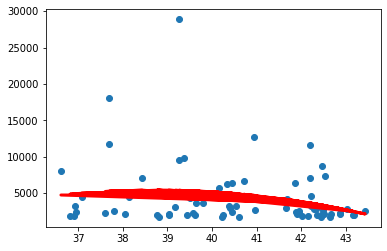

In [342]:
plt.scatter(X, y)
plt.plot(X, Y_pred, color='red', linewidth=3)
plt.show()

In [343]:
pr.score(X_poli,y)

0.048572054290483835

**Time_ext vs superficie:**

In [344]:
X=dfll_h["time_ext"]
y=dfll_h["superficie"]
X=(np.array(X)).reshape(-1,1)
y=(np.array(y)).reshape(-1,1)
poli_reg = PolynomialFeatures(degree = 2)
X_poli = poli_reg.fit_transform(X)
pr = LinearRegression()
pr.fit(X_poli, y)
Y_pred = pr.predict(X_poli)

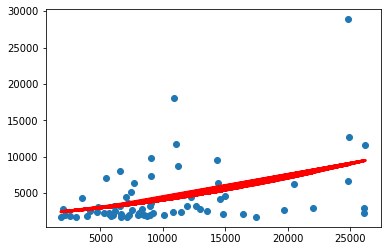

In [345]:
plt.scatter(X, y)
plt.plot(X, Y_pred, color='red', linewidth=3)
plt.show()

In [346]:
pr.score(X_poli,y)

0.1860308226627293

**Time_ctrl vs superficie:**

In [347]:
X=dfll_h["time_ctrl"]
y=dfll_h["superficie"]
X=(np.array(X)).reshape(-1,1)
y=(np.array(y)).reshape(-1,1)
poli_reg = PolynomialFeatures(degree = 2)
X_poli = poli_reg.fit_transform(X)
pr = LinearRegression()
pr.fit(X_poli, y)
Y_pred = pr.predict(X_poli)

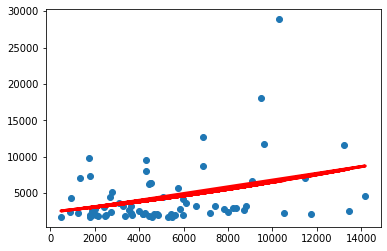

In [348]:
plt.scatter(X, y)
plt.plot(X, Y_pred, color='red', linewidth=3)
plt.show()

In [349]:
pr.score(X_poli,y)

0.10992744609693317

In [265]:
df["lat"]=df[lat]

count    82616.000000
mean        41.763721
std          2.019672
min          0.490720
25%         40.876544
50%         42.371123
75%         43.143145
max         87.824157
Name: lat, dtype: float64

## Latitud-Superficie:

In [41]:
dfl=df[["lat","superficie","fecha","year","month"]]

In [42]:
dfl= dfl.drop(dfl[dfl['lat']>44.0].index)
dfl= dfl.reset_index(drop=True)
dfl= dfl.drop(dfl[dfl['lat']<36.0].index)
dfl= dfl.reset_index(drop=True)

In [43]:
lat_round=[]
for i in range(len (dfl)):
    dfl["lat"][i]=round(dfl["lat"][i])
    lat_round.append(dfl["lat"][i])

/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [44]:
dfl["lat"]=pd.Categorical(dfl["lat"])

In [45]:
dfl.head()

,lat,superficie,fecha,year,month
0,43.0,3.70,2001-03-18,2001,3
1,43.0,1.50,2001-03-24,2001,3
2,43.0,7.50,2001-05-25,2001,5
3,43.0,1.04,2001-07-20,2001,7
4,43.0,1.25,2001-07-27,2001,7


In [197]:
c1=0
c2=0
c3=0
c4=0
c5=0
c6=0
c7=0
c8=0
c9=0
c10=0
c11=0
c12=0
c13=0
c14=0
c15=0
for i in range(len(dfl)):
    if dfl["year"][i]==2001:
        c1+=1
    if dfl["year"][i]==2002:
        c2+=1
    if dfl["year"][i]==2003:
        c3+=1
    if dfl["year"][i]==2004:
        c4+=1
    if dfl["year"][i]==2005:
        c5+=1
    if dfl["year"][i]==2006:
        c6+=1
    if dfl["year"][i]==2007:
        c7+=1
    if dfl["year"][i]==2008:
        c8+=1
    if dfl["year"][i]==2009:
        c9+=1
    if dfl["year"][i]==2010:
        c10+=1
    if dfl["year"][i]==2011:
        c11+=1
    if dfl["year"][i]==2012:
        c12+=1
    if dfl["year"][i]==2013:
        c13+=1
    if dfl["year"][i]==2014:
        c14+=1
    if dfl["year"][i]==2015:
        c15+=1
array=[c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15]
posiciones=np.cumsum(array)

In [198]:
posiciones

array([ 6890, 14676, 21282, 28877, 37869, 43433, 46815, 51146, 56903,
       60799, 66384, 71905, 74979, 78167, 82277])

In [46]:
dfl_2001=dfl[0:6890]
dfl_2002=dfl[6890:14676]
dfl_2003=dfl[14676:21282]
dfl_2004=dfl[21282:28877]
dfl_2005=dfl[28877:37869]
dfl_2006=dfl[37869:43433]
dfl_2007=dfl[43433:46815]
dfl_2008=dfl[46815:51146]
dfl_2009=dfl[51146:56903]
dfl_2010=dfl[56903:60799]
dfl_2011=dfl[60799:66384]
dfl_2012=dfl[66384:71905]
dfl_2013=dfl[71905:74979]
dfl_2014=dfl[74979:78167]
dfl_2015=dfl[78167:82277]

In [116]:
dfl01=dfl_2001.groupby(["lat"]).sum()
dfl02=dfl_2002.groupby(["lat"]).sum()
dfl03=dfl_2003.groupby(["lat"]).sum()
dfl04=dfl_2004.groupby(["lat"]).sum()
dfl05=dfl_2005.groupby(["lat"]).sum()
dfl06=dfl_2006.groupby(["lat"]).sum()
dfl07=dfl_2007.groupby(["lat"]).sum()
dfl08=dfl_2008.groupby(["lat"]).sum()
dfl09=dfl_2009.groupby(["lat"]).sum()
dfl10=dfl_2010.groupby(["lat"]).sum()
dfl11=dfl_2011.groupby(["lat"]).sum()
dfl12=dfl_2012.groupby(["lat"]).sum()
dfl13=dfl_2013.groupby(["lat"]).sum()
dfl14=dfl_2014.groupby(["lat"]).sum()
dfl15=dfl_2015.groupby(["lat"]).sum()


In [48]:
dflat=pd.DataFrame({"2001":dfl01["superficie"],
                   "2002":dfl02["superficie"],
                   "2003":dfl03["superficie"],
                   "2004":dfl04["superficie"],
                   "2005":dfl05["superficie"],
                   "2006":dfl06["superficie"],
                   "2007":dfl07["superficie"],
                   "2008":dfl08["superficie"],
                   "2009":dfl09["superficie"],
                   "2010":dfl10["superficie"],
                   "2011":dfl11["superficie"],
                   "2012":dfl12["superficie"],
                   "2013":dfl13["superficie"],
                   "2014":dfl14["superficie"],
                   "2015":dfl15["superficie"]})

In [49]:
a=dflat.transpose()

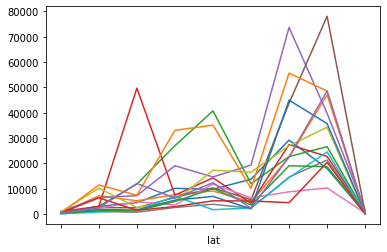

In [50]:
dflat.plot(legend=False)

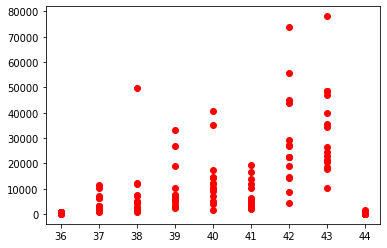

In [159]:
y1=dfl01["superficie"].tolist()
y2=dfl02["superficie"].tolist()
y3=dfl03["superficie"].tolist()
y4=dfl04["superficie"].tolist()
y5=dfl05["superficie"].tolist()
y6=dfl06["superficie"].tolist()
y7=dfl07["superficie"].tolist()
y8=dfl08["superficie"].tolist()
y9=dfl09["superficie"].tolist()
y10=dfl10["superficie"].tolist()
y11=dfl11["superficie"].tolist()
y12=dfl12["superficie"].tolist()
y13=dfl13["superficie"].tolist()
y14=dfl14["superficie"].tolist()
y15=dfl15["superficie"].tolist()

x=np.arange(36,45)
plt.plot(x,y1,"ro",x,y2,"ro",x,y3,"ro",x,y4,"ro",x,y5,"ro",x,y6,"ro",x,y7,"ro",x,y8,"ro",x,y9,"ro",x,y10,"ro",x,y11,"ro",x,y12,"ro",x,y13,"ro",x,y14,"ro",x,y15,"ro")

In [51]:
a=dfl_2001.groupby(["month","lat"]).sum()
a=a.fillna(0)
b=dfl_2002.groupby(["month","lat"]).sum()
b=b.fillna(0)
c=dfl_2003.groupby(["month","lat"]).sum()
c=c.fillna(0)
d=dfl_2004.groupby(["month","lat"]).sum()
d=d.fillna(0)
e=dfl_2005.groupby(["month","lat"]).sum()
e=e.fillna(0)
f=dfl_2006.groupby(["month","lat"]).sum()
f=f.fillna(0)
g=dfl_2007.groupby(["month","lat"]).sum()
g=g.fillna(0)
h=dfl_2008.groupby(["month","lat"]).sum()
h=h.fillna(0)
i=dfl_2009.groupby(["month","lat"]).sum()
i=i.fillna(0)
j=dfl_2010.groupby(["month","lat"]).sum()
j=j.fillna(0)
k=dfl_2011.groupby(["month","lat"]).sum()
k=k.fillna(0)
l=dfl_2012.groupby(["month","lat"]).sum()
l=l.fillna(0)
m=dfl_2013.groupby(["month","lat"]).sum()
m=m.fillna(0)
n=dfl_2014.groupby(["month","lat"]).sum()
n=n.fillna(0)
o=dfl_2015.groupby(["month","lat"]).sum()
o=o.fillna(0)


In [52]:
#JULIO:
a=a[55:63]
b=b[55:63]
c=c[55:63]
d=d[55:63]
e=e[55:63]
f=f[55:63]
g=g[55:63]
h=h[55:63]
i=i[55:63]
j=j[55:63]
k=k[55:63]
l=l[55:63]
m=m[55:63]
n=n[55:63]
o=o[55:63]

In [53]:
a["2001"]=a["superficie"].tolist()
a["2002"]=b["superficie"].tolist()
a["2003"]=c["superficie"].tolist()
a["2004"]=d["superficie"].tolist()
a["2005"]=e["superficie"].tolist()
a["2006"]=f["superficie"].tolist()
a["2007"]=g["superficie"].tolist()
a["2008"]=h["superficie"].tolist()
a["2009"]=i["superficie"].tolist()
a["2010"]=j["superficie"].tolist()
a["2011"]=k["superficie"].tolist()
a["2012"]=l["superficie"].tolist()
a["2013"]=m["superficie"].tolist()
a["2014"]=n["superficie"].tolist()
a["2015"]=o["superficie"].tolist()

In [54]:
a

superficie     2001     2002     2003      2004      2005  \
month lat                                                               
7     37.0     1335.28  1335.28  1404.64   940.77   1301.10   1105.13   
      38.0     1594.84  1594.84  2156.14  3664.20  32638.40    847.95   
      39.0     2308.42  2308.42  2428.65  3475.92   3466.50  12097.43   
      40.0     2998.04  2998.04  2652.47  5214.06   2384.25   4286.60   
      41.0     3631.36  3631.36  1098.21  2330.09   1220.28  14452.71   
      42.0     2174.77  2174.77  1913.63  1456.45   9087.63   5889.06   
      43.0      605.96   605.96   746.13   410.45   3325.61   3809.64   
      44.0       86.00    86.00    11.05    31.15    119.47    111.34   

               2006     2007    2008      2009     2010     2011      2012  \
month lat                                                                    
7     37.0  1300.09  1392.20  501.79   7437.97   217.27   264.45    447.60   
      38.0  1107.07  3319.98  318.11   1600.16   556.97   469.60   6826.23   
      39.0  1018.00  1666.05  753.67   2422.41   695.41   792.09    724.55   
      40.0  3405.83   727.81  482.90  14296.62   227.53  1961.19   1069.43   
      41.0   593.27  2630.90  156.23  13313.51  1526.98   506.84   1624.29   
      42.0  1390.91   499.20  410.46   3199.60   481.73   818.14  10516.04   
      43.0  5239.49    43.09  293.96   2596.05   369.57   698.61    550.07   
      44.0    44.50     0.00   19.80     10.80    11.48    17.27      6.60   

               2013     2014      2015  
month lat                               
7     37.0   435.92   245.83   1696.65  
      38.0   575.17   591.90  10855.11  
      39.0  2741.05   407.83   1264.57  
      40.0  5122.45   966.79   2238.72  
      41.0  2110.18  3546.69    905.11  
      42.0   526.42  1022.77  12882.93  
      43.0   284.24   143.80   6545.13  
      44.0    77.86    14.64     28.58

In [56]:
a=a.drop(["superficie"],axis=1)


In [100]:
a=a.transpose()
a

month        7                                                             \
lat       37.0      38.0      39.0      40.0      41.0      42.0     43.0   
2001   1335.28   1594.84   2308.42   2998.04   3631.36   2174.77   605.96   
2002   1404.64   2156.14   2428.65   2652.47   1098.21   1913.63   746.13   
2003    940.77   3664.20   3475.92   5214.06   2330.09   1456.45   410.45   
2004   1301.10  32638.40   3466.50   2384.25   1220.28   9087.63  3325.61   
2005   1105.13    847.95  12097.43   4286.60  14452.71   5889.06  3809.64   
2006   1300.09   1107.07   1018.00   3405.83    593.27   1390.91  5239.49   
2007   1392.20   3319.98   1666.05    727.81   2630.90    499.20    43.09   
2008    501.79    318.11    753.67    482.90    156.23    410.46   293.96   
2009   7437.97   1600.16   2422.41  14296.62  13313.51   3199.60  2596.05   
2010    217.27    556.97    695.41    227.53   1526.98    481.73   369.57   
2011    264.45    469.60    792.09   1961.19    506.84    818.14   698.61   
2012    447.60   6826.23    724.55   1069.43   1624.29  10516.04   550.07   
2013    435.92    575.17   2741.05   5122.45   2110.18    526.42   284.24   
2014    245.83    591.90    407.83    966.79   3546.69   1022.77   143.80   
2015   1696.65  10855.11   1264.57   2238.72    905.11  12882.93  6545.13   

month          
lat      44.0  
2001    86.00  
2002    11.05  
2003    31.15  
2004   119.47  
2005   111.34  
2006    44.50  
2007     0.00  
2008    19.80  
2009    10.80  
2010    11.48  
2011    17.27  
2012     6.60  
2013    77.86  
2014    14.64  
2015    28.58

In [196]:
a.columns.values

array([(7, 37.0), (7, 38.0), (7, 39.0), (7, 40.0), (7, 41.0), (7, 42.0),
       (7, 43.0), (7, 44.0)], dtype=object)

In [58]:
from sklearn.linear_model import LinearRegression

In [81]:
feature_cols=[(7, 37.0),(7, 38.0),(7, 39.0),(7, 40.0),(7, 41.0),(7, 42.0),(7, 43.0),(7, 44.0)]

In [82]:
X= a[feature_cols]
Y= np.arange(2001,2016)

In [83]:
lm= LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
lm.score(X,Y)

0.6789512829353479

In [85]:
lm.intercept_

2009.961331030737

In [86]:
lm.coef_

array([-0.00508907,  0.00012858, -0.00238237,  0.00117788,  0.00167889,
        0.00029551,  0.00092838, -0.04901073])

In [87]:
import statsmodels.formula.api as snf

In [103]:
x=a[(7, 37.0)].tolist()
y=np.arange(2001,2016)

In [109]:
from sklearn.cross_decomposition import tests
from sklearn.model_selection import train_test_split

In [110]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.3, random_state=0)

In [112]:
lm= LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [115]:
lm.score(X_test,Y_test)

-72.4362888054507

In [118]:
df

,superficie,fecha,lat,lng,latlng_explicit,idcomunidad,causa,causa_desc,muertos,heridos,time_ctrl,time_ext,personal,medios,gastos,perdidas,year,month
0,3.70,2001-03-18,42.954656,-2.325719,1,1,4,2,0.0,0.0,150,180,10,2,661.000000,553.000000,2001,3
1,1.50,2001-03-24,42.552183,-2.640673,1,1,2,10,0.0,0.0,275,290,4,1,661.000000,451.000000,2001,3
2,1.50,2001-04-16,48.302507,-3.397798,1,1,2,10,0.0,0.0,135,165,4,1,312.000000,902.000000,2001,4
3,7.50,2001-05-25,42.946479,-2.485163,1,1,4,2,0.0,0.0,335,410,6,1,1082.000000,15338.000000,2001,5
4,1.04,2001-07-20,43.091715,-3.024574,1,1,5,0,0.0,0.0,45,75,11,2,270.000000,2866.000000,2001,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82611,1.01,2015-07-10,41.324187,-1.791716,1,10,3,20,0.0,0.0,63,198,26,3,7492.871137,1.000000,2015,7
82612,11.20,2015-08-31,41.873662,-0.900144,1,10,1,0,0.0,0.0,110,455,49,5,7492.871137,21096.000000,2015,8
82613,1.11,2015-09-15,41.214308,0.249973,1,10,3,10,0.0,0.0,69,329,15,2,7492.871137,1.000000,2015,9
82614,1.28,2015-09-25,41.387613,-1.326090,1,10,5,0,0.0,0.0,51,211,19,4,7492.871137,1.000000,2015,9


In [ ]:
df_comp=raw

In [119]:
df_comp.superficie.plot(figsize=(20,5))


NameError: name 'df_comp' is not defined

In [ ]:
lm= linear_model.LogisticRegression()
lm.fit(X_train,Y_train)

In [170]:
a.describe()

month            7                                                          \
lat           37.0          38.0          39.0          40.0          41.0   
count    15.000000     15.000000     15.000000     15.000000     15.000000   
mean   1335.112667   4474.788667   2417.503333   3202.312667   3309.776667   
std    1762.050994   8310.059729   2868.196176   3458.234851   4419.908473   
min     217.270000    318.110000    407.830000    227.530000    156.230000   
25%     441.760000    583.535000    772.880000   1018.110000   1001.660000   
50%    1105.130000   1594.840000   1666.050000   2384.250000   1624.290000   
75%    1363.740000   3492.090000   2584.850000   3846.215000   3088.795000   
max    7437.970000  32638.400000  12097.430000  14296.620000  14452.710000   

month                                         
lat            42.0         43.0        44.0  
count     15.000000    15.000000   15.000000  
mean    3484.649333  1710.786667   39.369333  
std     4114.508371  2085.852908   39.609518  
min      410.460000    43.090000    0.000000  
25%      672.280000   331.765000   11.265000  
50%     1456.450000   605.960000   19.800000  
75%     4544.330000  2960.830000   61.180000  
max    12882.930000  6545.130000  119.470000

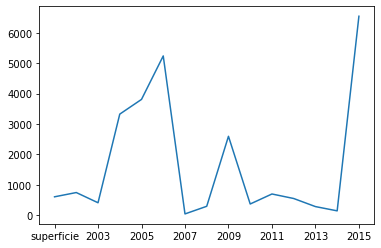

In [169]:
z.plot()

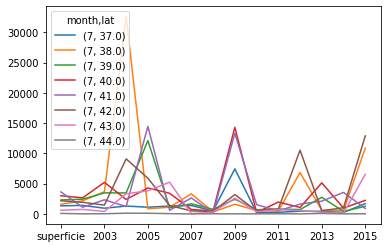

In [163]:
a.plot()

In [88]:
a.head()

superficie     2002
month lat                      
7     37.0     1335.28  1404.64
      38.0     1594.84  2156.14
      39.0     2308.42  2428.65
      40.0     2998.04  2652.47
      41.0     3631.36  1098.21

AttributeError: 'list' object has no attribute 'join'

KeyError: 'month'

In [ ]:
df[["muertos","heridos"]]= df[["muertos","heridos"]].fillna(0)

In [91]:
df2=df2.iloc[:,0:1]

In [ ]:
df2.plot(kind="bar")

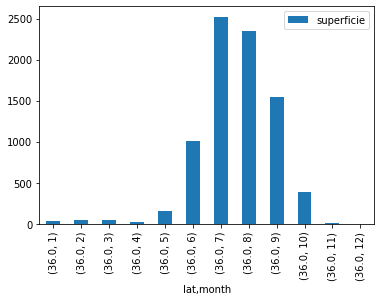

In [69]:
df2[:12].plot(kind="bar")

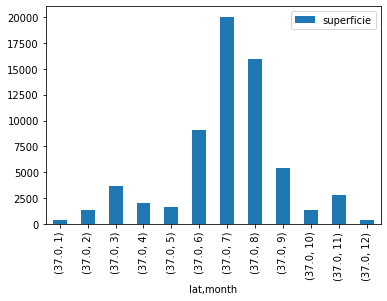

In [73]:
df2[12:24].plot(kind="bar")

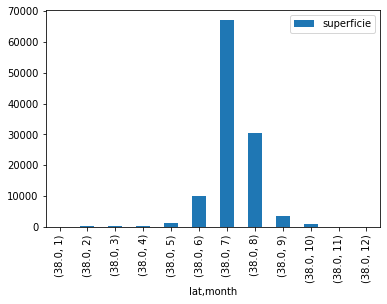

In [72]:
df2[24:36].plot(kind="bar")

In [77]:
df5=dfll.groupby(["lat"]).sum()

In [81]:
df6=df5.iloc[:,0:1]

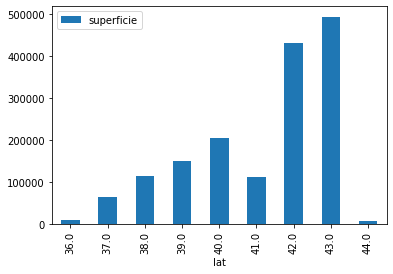

In [82]:
df6.plot(kind="bar")

In [83]:
df8=df.groupby(["month"]).sum()

In [84]:
df9=df8.iloc[:,0:1]

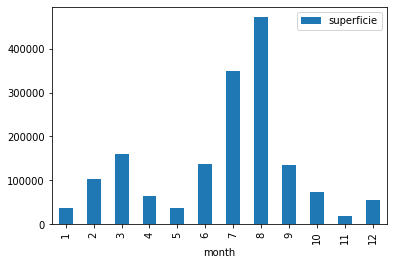

In [85]:
df9.plot(kind="bar")

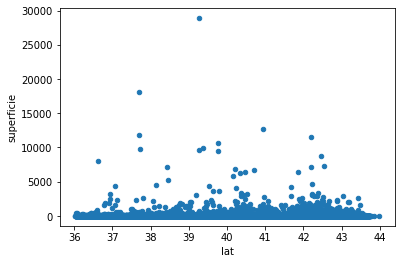

In [89]:
dfll.plot(kind="scatter",x="lat",y="superficie")


In [97]:
a=dfl.groupby(["year","month","lat"]).sum()

In [98]:
a.head()

superficie
year month lat             
2001 1     36.0         NaN
           37.0       23.02
           38.0         NaN
           39.0        5.00
           40.0        3.50

In [102]:
a.iloc[:,0:1]

superficie
year month lat             
2001 1     36.0         NaN
           37.0       23.02
           38.0         NaN
           39.0        5.00
           40.0        3.50
...                     ...
2015 12    40.0       82.13
           41.0        4.00
           42.0      512.67
           43.0    28282.55
           44.0      113.55

[1620 rows x 1 columns]

In [57]:
df3=df2.iloc[1:10,0]

In [58]:
df3.plot(kind="scatter")

ValueError: plot kind scatter can only be used for data frames

In [372]:
a=pd.qcut(a,q=6,duplicates="drop")

In [377]:
a

[(0.999, 2.0], (0.999, 2.0], (0.999, 2.0], (0.999, 2.0], (0.999, 2.0], ..., (12.0, 28879.0], (12.0, 28879.0], (12.0, 28879.0], (12.0, 28879.0], (12.0, 28879.0]]
Length: 87323
Categories (5, interval[float64]): [(0.999, 2.0] < (2.0, 3.0] < (3.0, 5.0] < (5.0, 12.0] < (12.0, 28879.0]]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x125b83a90>]],
      dtype=object)

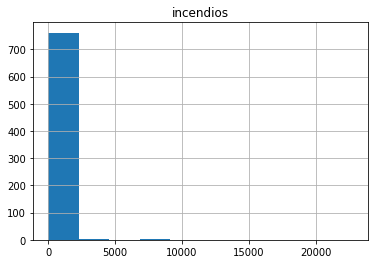

In [201]:
tab.hist( bins = 10)




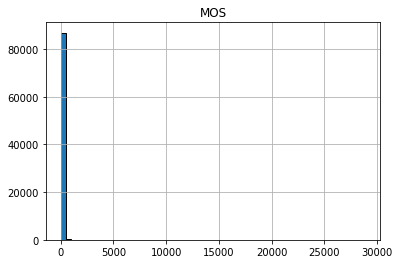

<Figure size 432x288 with 0 Axes>

In [202]:
sup = df["superficie"]

plt.title('MOS')
plt.hist(sup, bins=60, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.show()
plt.clf()

In [203]:
a=[1,2,3,4,5,6,7]

In [204]:
pd.qcut(a, 4)

[(0.999, 2.5], (0.999, 2.5], (2.5, 4.0], (2.5, 4.0], (4.0, 5.5], (5.5, 7.0], (5.5, 7.0]]
Categories (4, interval[float64]): [(0.999, 2.5] < (2.5, 4.0] < (4.0, 5.5] < (5.5, 7.0]]

In [64]:
def remove_outlier(df_in, col_name):
       q1 = df_in[col_name].quantile(0.25)
       q3 = df_in[col_name].quantile(0.75)
       iqr = q3-q1 #Interquartile range
       fence_low  = q1-1.5*iqr
       fence_high = q3+1.5*iqr
       df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
       return df_out